# IS509 Assignment 34

### Due: December 22, Monday-23.30

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_3.ipynb (e.g., “e123456_HW_3.ipynb”).
- Late submissions will be accepted by December 25, 2021, 23:30 with 5% per day penalty.
<!-- - Do not change variable names in the code blocks and the texts in the markdowns. -->
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.

For the following questions, use the provided dataset (data.csv) that consists of 1000 examples with eleven input features (c1, c2, n1, n2, n3, n4, n5, n6, u1, u2, u3) and one target variable (y).   
Please apply preprocessing steps, if necessary.

## Q1) Train-Test split (25 pts)

In this part, train-test split will be applied with test sizes of 5%,10%,...., 90%, and 95%. 

- For each test size option, randomly split the original dataset into a training set and a testing set, fit a linear regression model using the train set, and calculate mean squared error (MSE) on the train set and the test set. 

- Repeat the above experiment 100 times for each test size option and find the median and the interquartile range (IQR) of MSE values for each test size option. (You may also consider other statistics that you think helpful to comment on the results)

- Plot and comment on the results. 

- Are the medians and the IQR of MSE similar for different test sizes? Why are they different (or similar)?

- Which option (or options) seems to be better for training/testing on this dataset? Explain your reasoning.

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [4]:
new_data = pd.read_csv("hw3_data.csv")
new_data.head()

,c1,c2,n1,n2,n3,n4,n5,n6,u1,u2,u3,y
0,D,very_high,17.00,21.51,20.20,9.62,18.58,9.75,4.43,10.39,20.74,167.013
1,B,very_low,29.57,17.14,26.70,11.06,18.83,9.22,9.10,6.27,21.86,182.912
2,C,very_high,32.39,22.10,22.05,9.86,19.91,10.04,4.65,16.50,8.12,276.716
3,D,moderate,19.34,17.70,32.03,11.08,21.24,10.14,2.21,14.87,8.00,167.443
4,D,moderate,27.20,15.79,26.29,10.36,20.76,11.10,9.50,7.14,6.97,176.137


In [5]:
new_data = pd.get_dummies(new_data,drop_first=True)

In [6]:
new_data.head()

,n1,n2,n3,n4,n5,n6,u1,u2,u3,y,...,c1_E,c1_F,c1_G,c1_H,c1_I,c1_J,c2_low,c2_moderate,c2_very_high,c2_very_low
0,17.00,21.51,20.20,9.62,18.58,9.75,4.43,10.39,20.74,167.013,...,0,0,0,0,0,0,0,0,1,0
1,29.57,17.14,26.70,11.06,18.83,9.22,9.10,6.27,21.86,182.912,...,0,0,0,0,0,0,0,0,0,1
2,32.39,22.10,22.05,9.86,19.91,10.04,4.65,16.50,8.12,276.716,...,0,0,0,0,0,0,0,0,1,0
3,19.34,17.70,32.03,11.08,21.24,10.14,2.21,14.87,8.00,167.443,...,0,0,0,0,0,0,0,1,0,0
4,27.20,15.79,26.29,10.36,20.76,11.10,9.50,7.14,6.97,176.137,...,0,0,0,0,0,0,0,1,0,0


In [7]:
training_set_mse = []
testing_set_mse = []


test_sizes = [0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]

for ts in test_sizes:
    training_mse = []         # collect the individual training mse values in this list.
    testing_mse  = []         # # collect the individual testing mse values in this list.
    
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(new_data.drop("y",axis=1), new_data["y"], test_size=ts,random_state=i)
        model = LinearRegression().fit(X_train, y_train)
        training_mse.append(mean_squared_error(y_train, model.predict(X_train)))
        testing_mse.append(mean_squared_error(y_test, model.predict(X_test)))
    training_set_mse.append(training_mse)
    testing_set_mse.append(testing_mse)
    


In [8]:
new_data_frame_for_testing_set_mse_values = pd.DataFrame(testing_set_mse,index=test_sizes)
new_data_frame_for_training_set_mse_values = pd.DataFrame(training_set_mse,index=test_sizes)

new_data_frame_for_training_set_mse_values

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0.05,46.511031,46.062098,46.202317,46.487610,46.471049,45.129186,47.013940,45.951624,46.443896,45.838148,...,46.314388,42.686980,46.347015,46.485008,45.349157,47.006569,42.343831,47.217266,44.118191,42.667736
0.10,47.677164,46.174254,47.328462,45.006839,45.164318,45.512452,47.769611,45.867525,45.420943,46.890100,...,47.030930,43.037211,46.852811,47.557511,45.240236,47.629130,42.166173,47.423298,44.260077,42.713656
0.15,47.107652,47.493953,45.762609,45.373261,44.298036,44.716952,46.644993,46.080483,45.201266,47.904912,...,47.159970,43.785575,45.892817,47.957849,46.496862,47.605614,39.047390,48.353551,44.104089,40.926122
0.20,48.578040,48.991243,43.202429,43.747203,42.461559,45.541886,47.418797,42.906840,46.090191,49.531100,...,48.076666,44.984193,47.180932,48.113004,43.966111,47.150933,39.437117,49.256666,44.018251,41.704638
0.25,50.417926,50.649420,44.862659,41.668971,37.765245,46.286211,48.644333,42.403027,45.651882,49.419243,...,45.479921,45.123720,48.536425,49.354211,44.850329,47.116725,40.707948,48.901718,45.128478,41.122848
0.30,51.037715,52.218642,42.732721,41.348178,36.080249,46.838565,46.681493,42.015524,41.531026,49.726922,...,44.571634,41.860183,48.953904,49.859208,44.364593,48.500251,40.962419,50.440793,45.841602,41.966881
0.35,46.166827,53.130474,44.219999,41.780060,36.694357,47.914525,40.379778,42.013504,39.283782,47.931714,...,45.874235,39.617472,49.753286,49.514356,45.124976,47.918657,41.210776,48.705357,46.757925,41.694122
0.40,47.515651,49.191375,45.628916,43.017955,36.396787,47.725987,37.869700,43.690954,38.863087,49.822913,...,47.104441,35.393841,48.415717,50.588100,46.286543,46.258032,41.706238,46.630168,47.597190,42.116088
0.45,48.950071,46.322918,42.790806,40.066019,37.686574,44.906774,37.677414,37.182738,39.934525,51.607337,...,47.650398,35.133675,49.812549,47.493118,47.479052,46.982911,42.826103,47.508808,48.998302,42.316230
0.50,45.961018,43.264344,40.071410,39.440497,37.076346,45.576140,37.389323,37.957959,40.302914,46.308178,...,48.758484,35.520125,46.210520,49.322416,49.318610,49.046621,43.044748,49.706563,49.238076,44.301375


In [10]:
medians_of_testing_set_mse_values = new_data_frame_for_testing_set_mse_values.median(axis=1)
medians_of_training_set_mse_values = new_data_frame_for_training_set_mse_values.median(axis=1)



In [11]:
Q1_for_testing_set_mse_values = new_data_frame_for_testing_set_mse_values.T.quantile(0.25)
Q3_for_testing_set_mse_values = new_data_frame_for_testing_set_mse_values.T.quantile(0.75)

IQR_for_testing_set_mse_values = Q3_for_testing_set_mse_values - Q1_for_testing_set_mse_values

Q1_for_training_set_mse_values = new_data_frame_for_training_set_mse_values.T.quantile(0.25)
Q3_for_training_set_mse_values = new_data_frame_for_training_set_mse_values.T.quantile(0.75)

IQR_for_training_set_mse_values = Q3_for_training_set_mse_values - Q1_for_training_set_mse_values



In [12]:
new_data_frame_for_testing_set_mse_values.T.describe()

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.853589,48.535028,47.493272,47.807112,47.428552,48.111678,48.210672,48.633536,48.329258,49.045492,50.133103,50.627224,51.817699,52.548989,53.405219,54.668377,56.223842,62.123611,84.122521
std,30.193260,19.066654,14.895524,13.381395,11.548107,9.960031,8.975967,7.714102,6.829802,6.795007,7.517775,6.604743,7.590336,7.022338,5.745902,5.110102,4.055852,6.144379,21.254152
min,15.633027,19.834178,20.832759,26.707819,29.574444,31.914841,32.834429,33.456895,32.863070,34.250794,36.328400,37.300086,42.282087,41.378905,45.476921,46.908832,49.562074,52.694660,58.948297
25%,33.534333,34.747901,36.323942,37.831414,38.657543,40.903667,41.996828,43.310660,43.572822,44.447619,44.978681,46.449586,47.615608,48.785039,49.978696,51.829440,53.639865,58.298864,68.916680
50%,39.729479,43.231454,45.291277,44.571082,46.171230,47.491414,47.173245,47.964529,47.776717,48.329301,50.166587,50.315234,50.612207,51.349505,52.461891,53.616934,55.998370,61.397059,79.342149
75%,56.621777,57.639104,55.551790,54.773515,54.686055,54.829535,53.581377,53.155467,52.957095,53.552844,53.598050,53.546477,54.259279,54.362363,54.931261,56.493257,57.731010,64.730475,91.917603
max,201.208576,136.305975,107.581642,98.260812,84.107119,76.110792,72.852322,70.248983,66.016866,72.741438,85.974802,83.058957,87.893676,87.133387,84.824834,81.856761,79.169128,86.020370,188.490000


In [13]:
new_data_frame_for_training_set_mse_values.T.describe()

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,45.635801,45.688218,45.817722,45.790435,45.929087,45.733078,45.698896,45.438280,45.734635,45.696817,45.302829,44.873781,44.287899,43.755354,42.756061,41.273116,39.967555,36.969742,24.621614
std,1.513046,2.027562,2.494172,3.160123,3.653020,4.044330,4.571919,4.898674,5.323163,5.910612,6.604760,7.195059,7.864779,8.755191,8.986831,9.464452,11.215804,13.796243,13.278481
min,37.990554,36.469710,35.863408,34.395908,34.862636,35.052996,33.832174,32.371384,33.031200,32.356563,31.435477,29.200545,27.903985,27.357503,26.959574,25.828637,21.695616,13.432717,6.806536
25%,45.313644,44.728010,44.329852,44.005216,43.554009,43.117358,42.807309,42.676783,42.314559,41.436252,40.866502,40.271969,38.810493,36.657806,35.680755,33.688657,30.620404,26.259593,15.464054
50%,46.189215,46.284007,46.226796,46.612701,46.262542,45.902247,46.022852,45.667926,46.321213,46.047233,44.610380,44.652072,44.233750,43.831132,42.379545,40.608312,38.800245,32.833078,21.015600
75%,46.507747,47.119518,47.714361,48.137748,48.632595,48.749847,48.872471,49.016282,49.121822,49.262271,50.044619,49.976684,48.199786,48.725880,49.275270,48.465782,47.421186,45.125175,30.198290
max,47.412637,48.787750,50.354802,50.876371,51.578984,52.300460,53.915458,55.249887,57.574860,59.317866,61.238461,62.464865,61.684670,65.818202,65.058390,64.678516,70.593315,72.497834,93.766892


<AxesSubplot:>

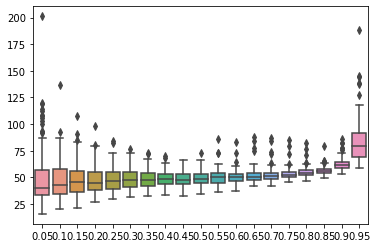

In [14]:
import seaborn as sns

transposed_data_frame = (new_data_frame_for_testing_set_mse_values.T)


sns.boxplot(data=transposed_data_frame)



<AxesSubplot:>

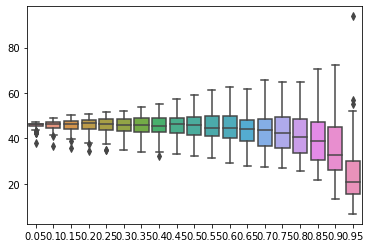

In [15]:
sns.boxplot(data=new_data_frame_for_training_set_mse_values.T)

In [17]:
# As can be seen from the above , medians of test set mse values  are pretty close to each other except the test sizes greater
# than 90%. Similar case is valid for medians of train set sme values as well.

# IQR's of test mse values get smaller till 90% test size. On the other hand, IQR's of train mse values get larger till 90% 
# train size. If small test set is used in the prediction, less reliable performance estimate is made. However, small training
# set is used in the prediction,the model gets less reliable. There should be a balance between test set and train set sizes.

# Bigger test size is better for testing , bigger training size is better for training.

## Q2 - Sample Size (25 pts)

In this part, models will be trained by using random samples of size 50,100,150,200,250,....,900, and 950 rows taken from the original dataset. 

- For each sample size option, randomly take a sample from the given dataset, apply train-test split (%70 train-%30 test), fit a linear regression model, and evaluate MSE on the train and test sets. 

- Repeat the above experiment 100 times for each sample size option and find the median and IQR of MSE values for each sample size option. (You may also consider other statistics that you think helpful to comment on the results)

- Plot and comment on the results.

- Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set? You can answer these questions for small and large sample sizes separately. 

- If there were more examples in the dataset, would the performance improve? 

- Could regularization improve the performance on the test set for small samples and/or large samples? Briefly explain your reasoning.      

In [18]:
train_set_mse = []
test_set_mse  = []


# Take random samples from the original dataset.

sample_size = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950]

for num in sample_size:
    newly_data = new_data.sample(n=num,random_state=num)
    
    train_mse = []
    test_mse  = []
    
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(newly_data.drop("y",axis=1), newly_data["y"], test_size=0.3, random_state=i)
        model2 = LinearRegression().fit(X_train, y_train)
        train_mse.append(mean_squared_error(y_train, model2.predict(X_train)))
        test_mse.append(mean_squared_error(y_test, model2.predict(X_test)))
    train_set_mse.append(train_mse)
    test_set_mse.append(test_mse)


In [20]:
new_data_frame_for_test_set_mse_values = pd.DataFrame(test_set_mse,index=sample_size)
new_data_frame_for_train_set_mse_values = pd.DataFrame(train_set_mse,index=sample_size)



In [21]:
medians_of_test_set_mse_values = new_data_frame_for_test_set_mse_values.median(axis=1)
medians_of_train_set_mse_values = new_data_frame_for_train_set_mse_values.median(axis=1)

In [22]:
Q1_for_test_set_mse_values = new_data_frame_for_test_set_mse_values.T.quantile(0.25)
Q3_for_test_set_mse_values = new_data_frame_for_test_set_mse_values.T.quantile(0.75)

IQR_for_test_set_mse_values = Q3_for_test_set_mse_values - Q1_for_test_set_mse_values

Q1_for_train_set_mse_values = new_data_frame_for_train_set_mse_values.T.quantile(0.25)
Q3_for_train_set_mse_values = new_data_frame_for_train_set_mse_values.T.quantile(0.75)

IQR_for_train_set_mse_values = Q3_for_train_set_mse_values - Q1_for_train_set_mse_values


<AxesSubplot:>

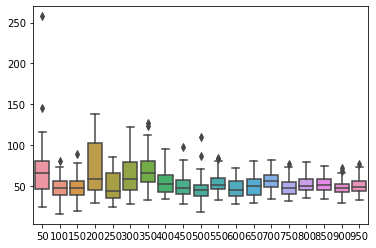

In [23]:
import seaborn as sns

sns.boxplot(data=new_data_frame_for_test_set_mse_values.T)

<AxesSubplot:>

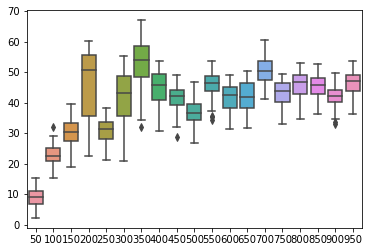

In [24]:
import seaborn as sns

sns.boxplot(data=new_data_frame_for_train_set_mse_values.T)

In [25]:
# As can be seen from the above plots, IQR's of train mse values changes significantly, there is no pattern to describe them. 
# However, IQR's of test mse values looks more stable compared to train mse values. In the first figure, median doesn't change
# significantly. However, median changes significantly in the second figure. 




# The performances on the train and test sets are different for different sample sizes. If there were small training sample, it would be 
# easy to perfectly fit the model on the training data. The error on training set would be small, but the error on the test set
# would be large. If there were large sample, it would NOT be easy to perfectly fit the model on the training data. The error on
# training set would be large, but the error on the test set would be small.On the other hand, more training data doesn't always mean 
# you will have more accurate model since high bias models will not benefit from more training examples.  




# If there were more examples in the dataset, the performance would improve.



# Regularization decreases overfitting. As the complexity of the model increases, overfitting problem gets worse because models 
# become increasingly tuned to the random noise on the predictors. Training error will be small but test error will be large in 
# this case. So, regularization improve the performance on the test set for large samples.






## Q3 - Polynomial Expansion d=2 (25 pts)

Answer the same questions in part Q2 (above) after applying polynomial expansion with degree=2 on the given dataset.    
**(Note: do not include bias i.e., set parameter include_bias=False)**  

In [26]:
train_set_MSE = []
test_set_MSE  = []

sample_sizes = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950]

for number in sample_sizes:
    brand_new_data = new_data.sample(n=number,random_state=number)
    poly = PolynomialFeatures(2, include_bias=False)                 # Use second degree polynomial.
    a = brand_new_data.drop("y",axis=1) 
    b = brand_new_data["y"]
    pf = poly.fit_transform(a)
    X = pd.DataFrame(pf, columns=poly.get_feature_names())
    
    train_MSE = []
    test_MSE  = []
    
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(pf, b, test_size=0.3, random_state=i)
        model3 = LinearRegression().fit(X_train, y_train)
        train_MSE.append(mean_squared_error(y_train, model3.predict(X_train)))
        test_MSE.append(mean_squared_error(y_test, model3.predict(X_test)))

    train_set_MSE.append(train_MSE)
    test_set_MSE.append(test_MSE)


In [27]:
new_data_frame_for_test_set_MSE_values = pd.DataFrame(test_set_MSE,index=sample_size)
new_data_frame_for_train_set_MSE_values = pd.DataFrame(train_set_MSE,index=sample_size)

new_data_frame_for_train_set_MSE_values

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
50,3.300414e-27,1.444796e-26,3.606221e-27,1.027629e-26,1.461529e-26,4.010118e-27,3.093272e-26,5.718024e-27,3.286566e-26,4.408245e-27,...,4.425555e-27,9.549274e-27,4.275536e-27,4.471714e-27,8.643391e-27,1.173032e-26,4.285345e-26,1.001664e-26,9.895471e-27,1.294778e-26
100,8.467408e-27,1.744834e-26,3.346285e-26,6.694589e-26,6.196931e-27,6.573132e-26,2.590998e-26,1.018685e-26,4.760212e-27,6.860475e-27,...,8.868419e-27,9.459840e-27,8.522222e-27,8.816490e-27,3.783359e-26,7.968307e-27,1.136104e-26,8.043316e-27,1.322473e-26,2.330484e-26
150,1.812535e-26,3.485629e-26,5.614742e-26,1.101484e-26,1.657900e-26,1.490379e-26,4.174946e-26,3.866254e-26,3.482937e-26,1.612510e-26,...,2.184505e-26,2.201237e-26,3.982615e-26,8.237379e-26,1.023205e-26,3.267525e-26,2.807275e-26,1.522306e-26,2.788811e-26,1.165146e-26
200,3.633701e-25,2.296110e-25,9.545668e-26,1.656583e-25,2.127122e-25,5.672788e-25,7.068194e-26,7.060116e-26,3.138970e-25,1.362719e-25,...,3.984730e-25,6.256650e-26,1.564913e-25,1.030196e-25,9.857245e-26,2.528077e-25,1.356545e-25,1.283267e-25,5.635500e-25,1.836201e-25
250,6.105750e-24,1.561448e-23,3.293097e-24,9.355357e-25,1.486967e-24,4.371403e-24,5.386593e-24,5.691252e-25,1.092173e-24,3.609390e-24,...,9.842953e-24,2.733155e-24,5.183634e-24,2.054978e-24,2.169507e-24,1.068999e-24,9.621787e-24,1.599506e-24,3.293028e-25,2.749647e-24
300,7.034703e-02,5.849105e-02,2.847635e-02,3.410310e-02,4.516901e-02,7.620917e-02,3.734748e-02,3.936461e-02,2.617719e-02,3.912078e-02,...,6.014694e-02,4.985233e-02,5.678046e-02,5.117003e-02,3.399819e-02,3.727606e-02,4.066243e-02,4.574958e-02,8.186361e-02,9.072025e-02
350,1.960492e-01,1.656064e-01,1.398184e-01,2.000629e-01,2.112088e-01,1.204678e-01,1.920936e-01,1.277224e-01,1.746121e-01,1.129087e-01,...,1.684927e-01,9.705192e-02,1.590903e-01,1.665104e-01,1.044336e-01,1.264181e-01,2.403459e-01,1.362289e-01,1.421970e-01,1.614940e-01
400,3.107779e-01,3.394504e-01,2.687865e-01,3.392374e-01,3.275556e-01,2.819865e-01,4.044022e-01,2.832304e-01,2.859707e-01,3.670808e-01,...,3.475230e-01,3.809746e-01,2.743566e-01,3.997514e-01,3.011443e-01,2.953452e-01,2.772778e-01,2.906285e-01,3.211024e-01,3.491241e-01
450,2.774856e-01,3.308617e-01,2.490155e-01,3.140468e-01,2.413196e-01,2.371751e-01,3.297915e-01,2.677446e-01,2.661431e-01,2.628361e-01,...,2.879761e-01,2.885014e-01,3.101991e-01,2.744379e-01,2.802312e-01,3.390952e-01,3.150039e-01,3.135569e-01,3.149193e-01,3.184242e-01
500,3.595582e-01,3.858039e-01,4.239082e-01,3.856588e-01,3.707443e-01,3.843053e-01,4.339619e-01,3.769024e-01,4.154533e-01,3.617008e-01,...,4.716646e-01,3.776187e-01,4.035334e-01,4.078383e-01,3.684526e-01,3.478068e-01,3.907725e-01,4.182690e-01,3.473914e-01,3.688276e-01


In [28]:
medians_of_test_set_MSE_values = new_data_frame_for_test_set_MSE_values.median(axis=1)
medians_of_train_set_MSE_values = new_data_frame_for_train_set_MSE_values.median(axis=1)

In [29]:
Q1_for_test_set_MSE_values = new_data_frame_for_test_set_MSE_values.T.quantile(0.25)
Q3_for_test_set_MSE_values = new_data_frame_for_test_set_MSE_values.T.quantile(0.75)

IQR_for_test_set_MSE_values = Q3_for_test_set_MSE_values - Q1_for_test_set_MSE_values

Q1_for_train_set_MSE_values = new_data_frame_for_train_set_MSE_values.T.quantile(0.25)
Q3_for_train_set_MSE_values = new_data_frame_for_train_set_MSE_values.T.quantile(0.75)

IQR_for_train_set_MSE_values = Q3_for_train_set_MSE_values - Q1_for_train_set_MSE_values


<AxesSubplot:>

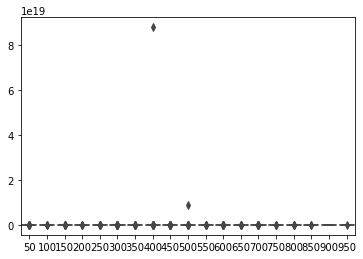

In [30]:
import seaborn as sns

sns.boxplot(data=new_data_frame_for_test_set_MSE_values.T)

<AxesSubplot:>

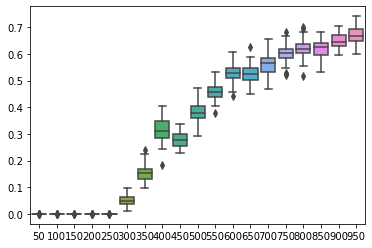

In [31]:
sns.boxplot(data=new_data_frame_for_train_set_MSE_values.T)

In [ ]:
# As can be seen from the the first figure above, MSE values are really close to zero. There is almost no error in the test test
# However, in the second figure the error is a bit higher but still train set MSE is very low. It can be clearly seen that the
# polynomial model fits much better than linear model in Q2. The reason might be that since the data set has many attributes,
# it may get more difficult to model the dataset with linear functions, but rather with higher order function. 


# The performances on the train and test sets are different for different sample sizes. If there were small training sample, it would be 
# easy to perfectly fit the model on the training data. The error on training set would be small, but the error on the test set
# would be large. If there were large sample, it would NOT be easy to perfectly fit the model on the training data. The error on
# training set would be large, but the error on the test set would be small.On the other hand, more training data doesn't always mean 
# you will have more accurate model since high bias models will not benefit from more training examples.  




# If there were more examples in the dataset, the performance would improve.



# Regularization decreases overfitting. As the complexity of the model increases, overfitting problem gets worse because models 
# become increasingly tuned to the random noise on the predictors. Training error will be small but test error will be large in 
# this case. So, regularization improve the performance on the test set for large samples.

## Q4 - Train (25 pts)

Take the first 100 rows of the given dataset as the input dataset. Then, use the LASSO regularization to fit the best possible model to the input dataset (perhaps, applying polynomial expansion with a suitable degree). When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. 

Report the model performance on the train/validation/test sets. 

What is the regression equation for the best model that you found? (You can simply consider magnitudes of the coefficients and include only the features that significantly contribute to the target variable)

In [48]:
# Firstly, define the dataframes.

first_hundred_rows = new_data.sample(n=100,random_state=36)
X = first_hundred_rows.drop(['y'], axis = 1)
Y = first_hundred_rows[['y']]

# Split dataset into 70% train set - 30% test set.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

model4 = linear_model.Lasso(alpha=0.1)   

#  As α increases, the flexibility of the lasso regression fit decreases, leading to decreased variance but increased bias.

model4.fit(X_train, y_train)

# Print the MSE values.

print("training set mse : " + str(mean_squared_error(y_train, model4.predict(X_train))))
print("test set mse : " + str(mean_squared_error(y_test, model4.predict(X_test))))
      
coefficients_of_model4 = model4.coef_

# Take the coefficients that significantly contribute to the target variable only. (ones higher than 0.15)

for coef in range(len(coefficients_of_model4)):
    if abs(coefficients_of_model4[coef]) > 0.15:    
        print("Coefficient of " + str(X.columns[coef])+  " = " + str(coefficients_of_model4[coef]))

training set mse : 25.77614780034084
test set mse : 84.43921356241425
Coefficient of n1 = 5.18812525661478
Coefficient of n2 = 8.219805653566011
Coefficient of n4 = -1.740716779725395
Coefficient of n6 = 0.21462126150439334
Coefficient of u1 = -0.2051509636460079
Coefficient of u2 = 2.260595762883383
Coefficient of u3 = -0.4945946526450388
Coefficient of c1_B = -1.6291104525518916
Coefficient of c1_C = 2.6989120882674644
Coefficient of c1_G = -1.0783344031102446
Coefficient of c1_I = 0.4016017514840342
Coefficient of c1_J = 2.863277471596186
Coefficient of c2_low = 1.030216997980458
Coefficient of c2_moderate = 0.46019609535688943
Coefficient of c2_very_low = -0.8097050681144233
